<a href="https://colab.research.google.com/github/jbouhadana13/Analysis-of-Stock-Market-Volume-using-Twitter-Sentiment/blob/main/Copy_of_DM2_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')


# Extract the variables from the CSV
x = data['twt_count']
y = data['Volume']

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Perform hypothesis test
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")


Correlation coefficient: 0.7727880709379692
p-value: 2.3628721807593797e-226
There is a significant correlation between the variables.


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.998817  0.998745  0.997278   0.997278 -0.371336   
High       0.998817  1.000000  0.998508  0.998776   0.998776 -0.360665   
Low        0.998745  0.998508  1.000000  0.998773   0.998773 -0.386160   
Close      0.997278  0.998776  0.998773  1.000000   1.000000 -0.372003   
Adj Close  0.997278  0.998776  0.998773  1.000000   1.000000 -0.372003   
Volume    -0.371336 -0.360665 -0.386160 -0.372003  -0.372003  1.000000   
P_mean     0.300716  0.312155  0.319399  0.328646   0.328646 -0.251825   
P_sum      0.114915  0.114308  0.125490  0.122729   0.122729 -0.676968   
twt_count -0.050281 -0.041529 -0.058721 -0.048344  -0.048344  0.772788   

             P_mean     P_sum  twt_count  
Open       0.300716  0.114915  -0.050281  
High       0.312155  0.114308  -0.041529  
Low        0.319399  0.125490  -0.058721  
Close      0.328646  0.122729  -0.048344  
Adj Close  0.328646  0.122729  -0.048344  
V

<ipython-input-4-0f3df8706c76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


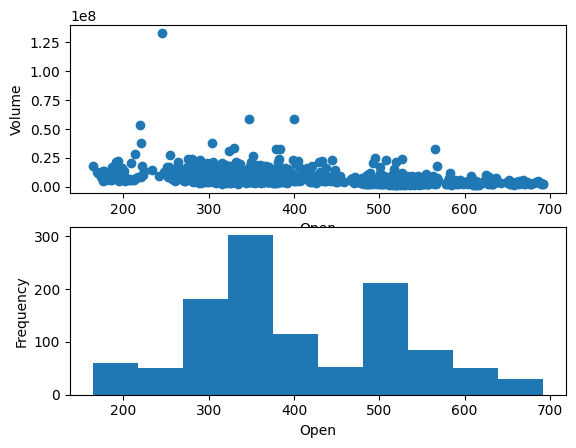

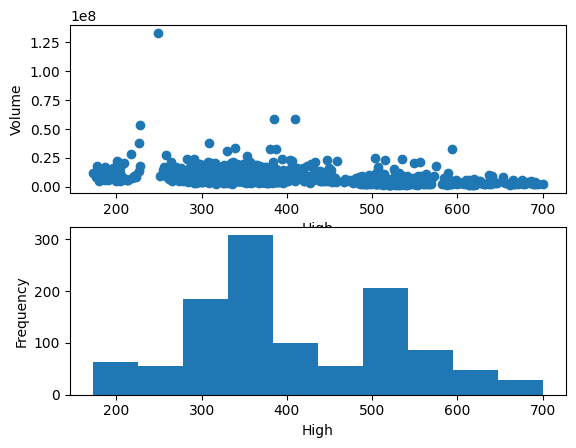

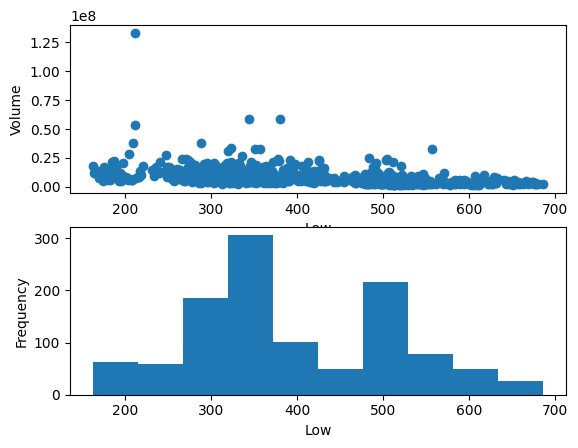

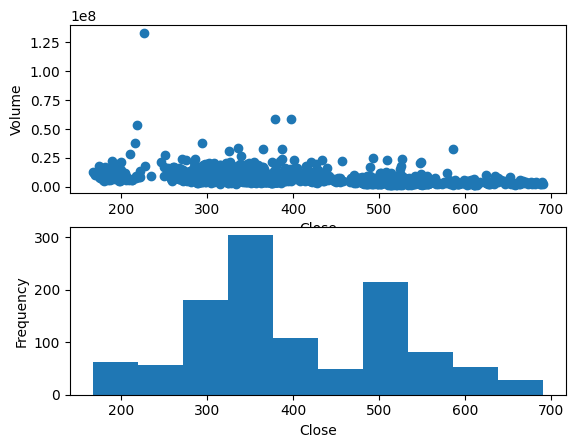

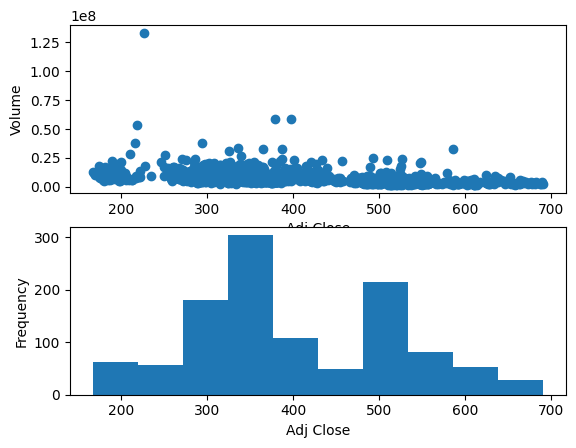

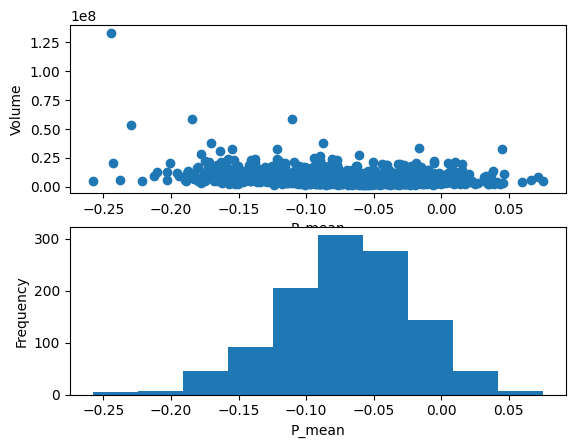

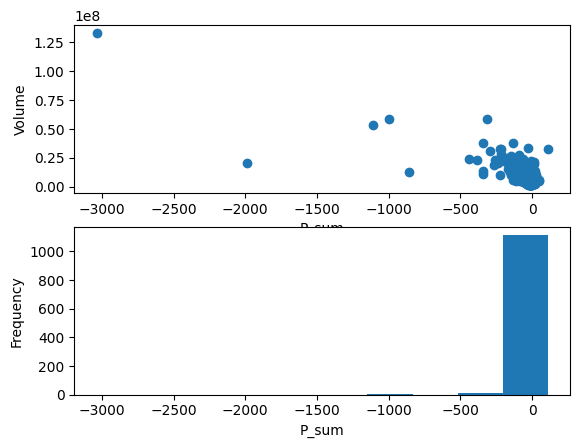

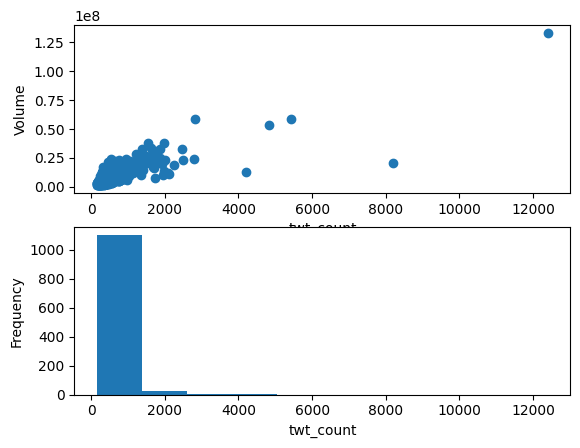

In [ ]:
#this is number 4 and 6

# Define the target variable and predictor variables
target_variable = 'Volume'
predictor_variables = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']

# Plot scatterplots and histograms
for predictor in predictor_variables:
    plt.figure()
    plt.subplot(2, 1, 1)  # Scatterplot
    plt.scatter(data[predictor], data[target_variable])
    plt.xlabel(predictor)
    plt.ylabel(target_variable)

    plt.subplot(2, 1, 2)  # Histogram
    plt.hist(data[predictor])
    plt.xlabel(predictor)
    plt.ylabel('Frequency')

plt.show()

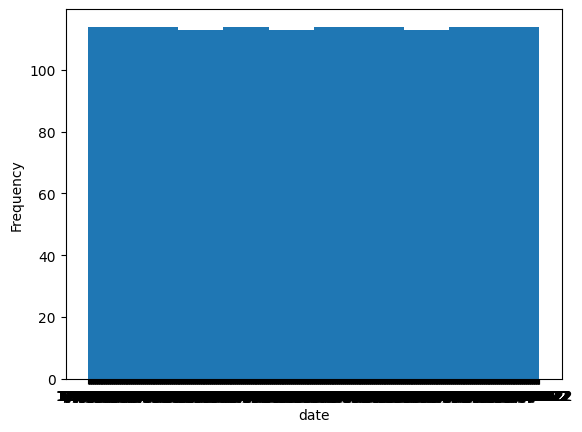

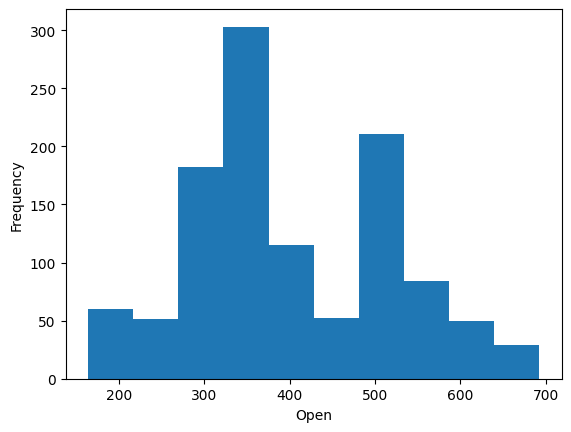

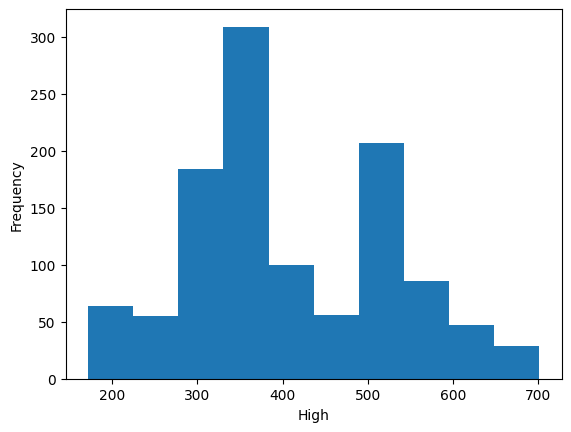

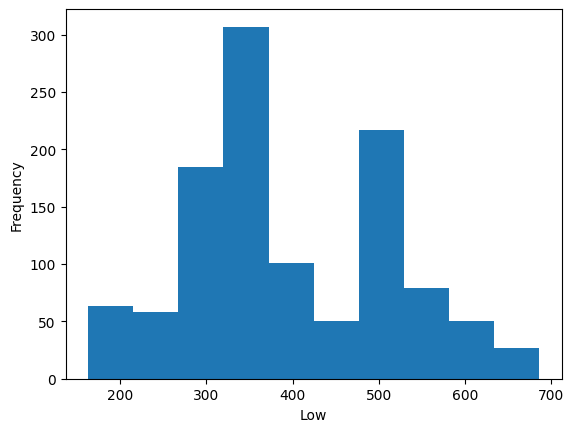

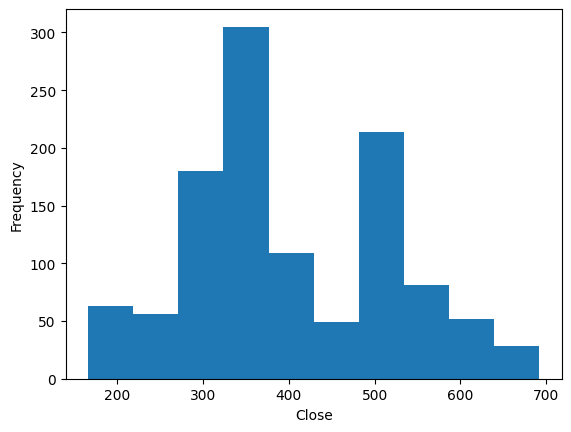

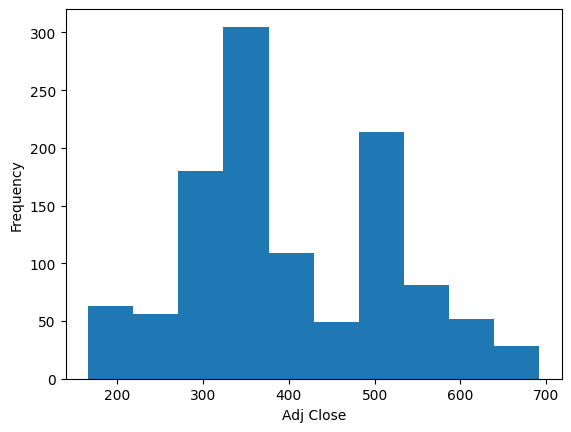

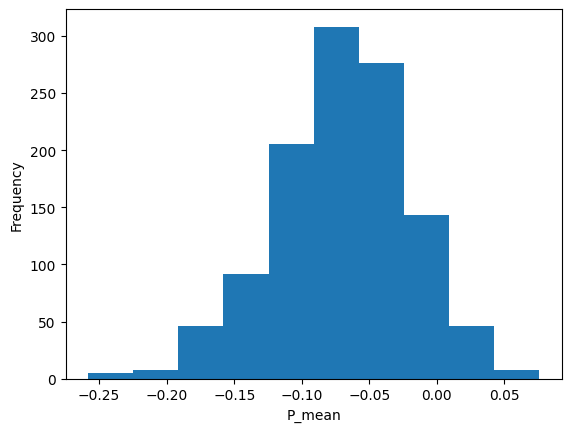

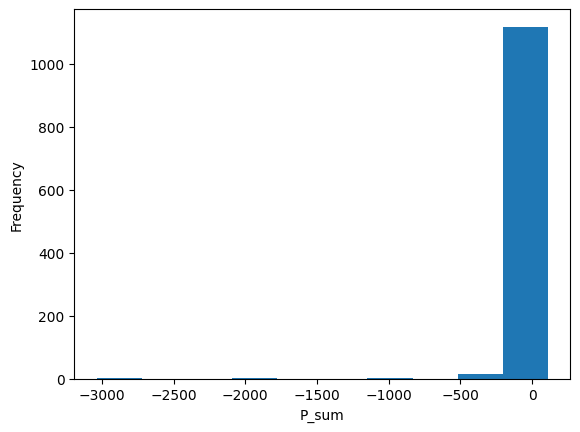

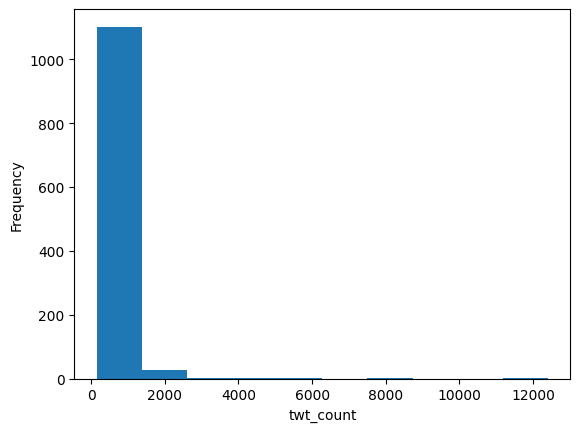

In [ ]:
# This is number 4 but this is more centralized!!



# Get the list of potential predictors
potential_predictors = data.columns.tolist()

# Remove the target variable from the list if it's present
target_variable = 'Volume'
if target_variable in potential_predictors:
    potential_predictors.remove(target_variable)

# Plot the distributions of potential predictors
for predictor in potential_predictors:
    plt.figure()
    plt.hist(data[predictor])
    plt.xlabel(predictor)
    plt.ylabel('Frequency')

plt.show()

Fixing the dataset

In [ ]:
# Check for NaN values
print(data.isnull().sum())

date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
P_mean       0
P_sum        0
twt_count    0
dtype: int64


In [ ]:
# Drop rows with NaN values (I think this drops some dates)
data = data.dropna()

In [ ]:
# Binarize the 'P_mean' column to create values of 0 and 1
#threshold at 0,
data['P_mean_bin'] = (data['P_mean'] > 0).astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Define your features
features = data.drop(['date', 'Volume'], axis=1)

# Fit and transform the data
features_standardized = scaler.fit_transform(features)

# Convert back to DataFrame
features_standardized = pd.DataFrame(features_standardized, columns=features.columns)

In [ ]:
# Identify continuous columns (excluding 'date' and 'P_mean_bin')
continuous_columns = data.columns.drop(['date', 'P_mean_bin'])

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the continuous columns
data_standardized_continuous = scaler.fit_transform(data[continuous_columns])

# Convert back to DataFrame
data_standardized_continuous = pd.DataFrame(data_standardized_continuous, columns=continuous_columns)

# Now, join the standardized continuous data with 'date' and 'P_mean_bin'
data_preprocessed = data_standardized_continuous.join(data[['date', 'P_mean_bin']])

display(data_preprocessed)

,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count,date,P_mean_bin
0,-1.770842,-1.764331,-1.734757,-1.730789,-1.730789,0.452211,1.818336,0.403714,-0.019657,1/2/2018,1
1,-1.719722,-1.725414,-1.682061,-1.696527,-1.696527,0.101180,2.823625,0.516486,-0.273213,1/3/2018,1
2,-1.684067,-1.718245,-1.660393,-1.691534,-1.691534,-0.277381,1.033155,0.290942,-0.487760,1/4/2018,0
3,-1.675045,-1.692898,-1.646612,-1.654002,-1.654002,-0.129078,1.008846,0.274832,-0.331725,1/5/2018,0
4,-1.651247,-1.671732,-1.621911,-1.636268,-1.636268,-0.343789,1.249757,0.307052,-0.407969,1/8/2018,0
...,...,...,...,...,...,...,...,...,...,...,...
1132,-1.939324,-1.948248,-1.918067,-1.912598,-1.912598,-0.400755,0.159300,0.154004,-0.273213,7/1/2022,0
1133,-1.941129,-1.898578,-1.931848,-1.861550,-1.861550,-0.084584,0.228956,0.121784,-0.117178,7/5/2022,0
1134,-1.864491,-1.896017,-1.861297,-1.877218,-1.877218,-0.318195,1.105956,0.258721,0.083184,7/6/2022,0
1135,-1.872481,-1.861965,-1.838070,-1.832368,-1.832368,-0.232325,0.296721,0.129839,-0.102994,7/7/2022,0


In [ ]:
EDA TIME BITCHES

SyntaxError: ignored

<ipython-input-16-df7183138619>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[col], ax=axes[i])
<ipython-input-16-df7183138619>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[col], ax=axes[i])
<ipython-input-16-df7183138619>:13: UserWarning: 

`distplot

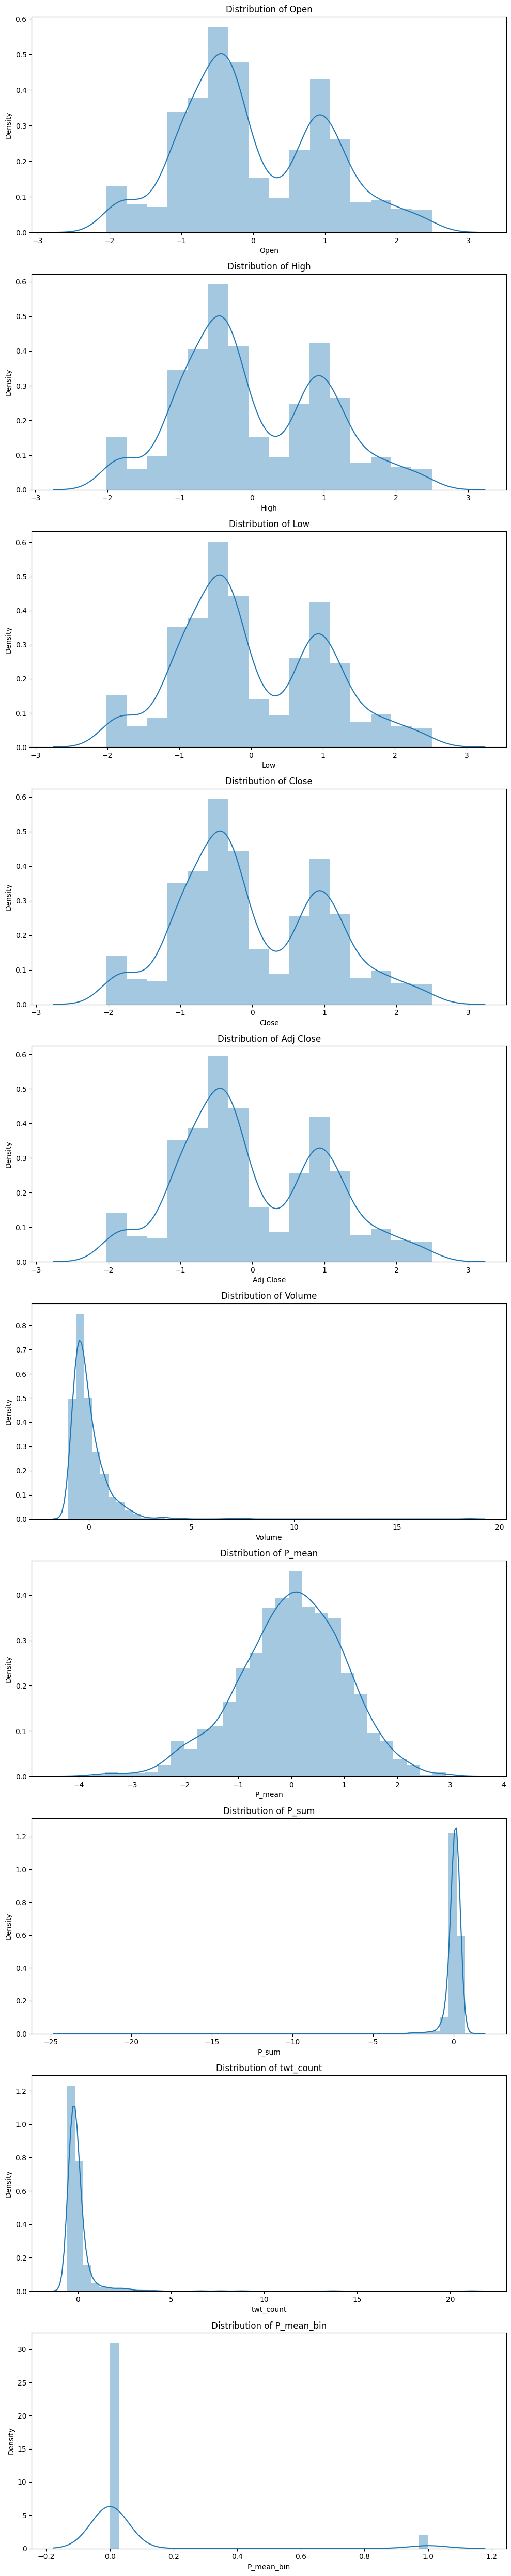

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns except 'date'
columns = data_preprocessed.columns.drop('date')

# Create a figure and axes
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))

# Loop over each column
for i, col in enumerate(columns):
    # Create distribution plot
    sns.distplot(data_preprocessed[col], ax=axes[i])
    # Set title
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

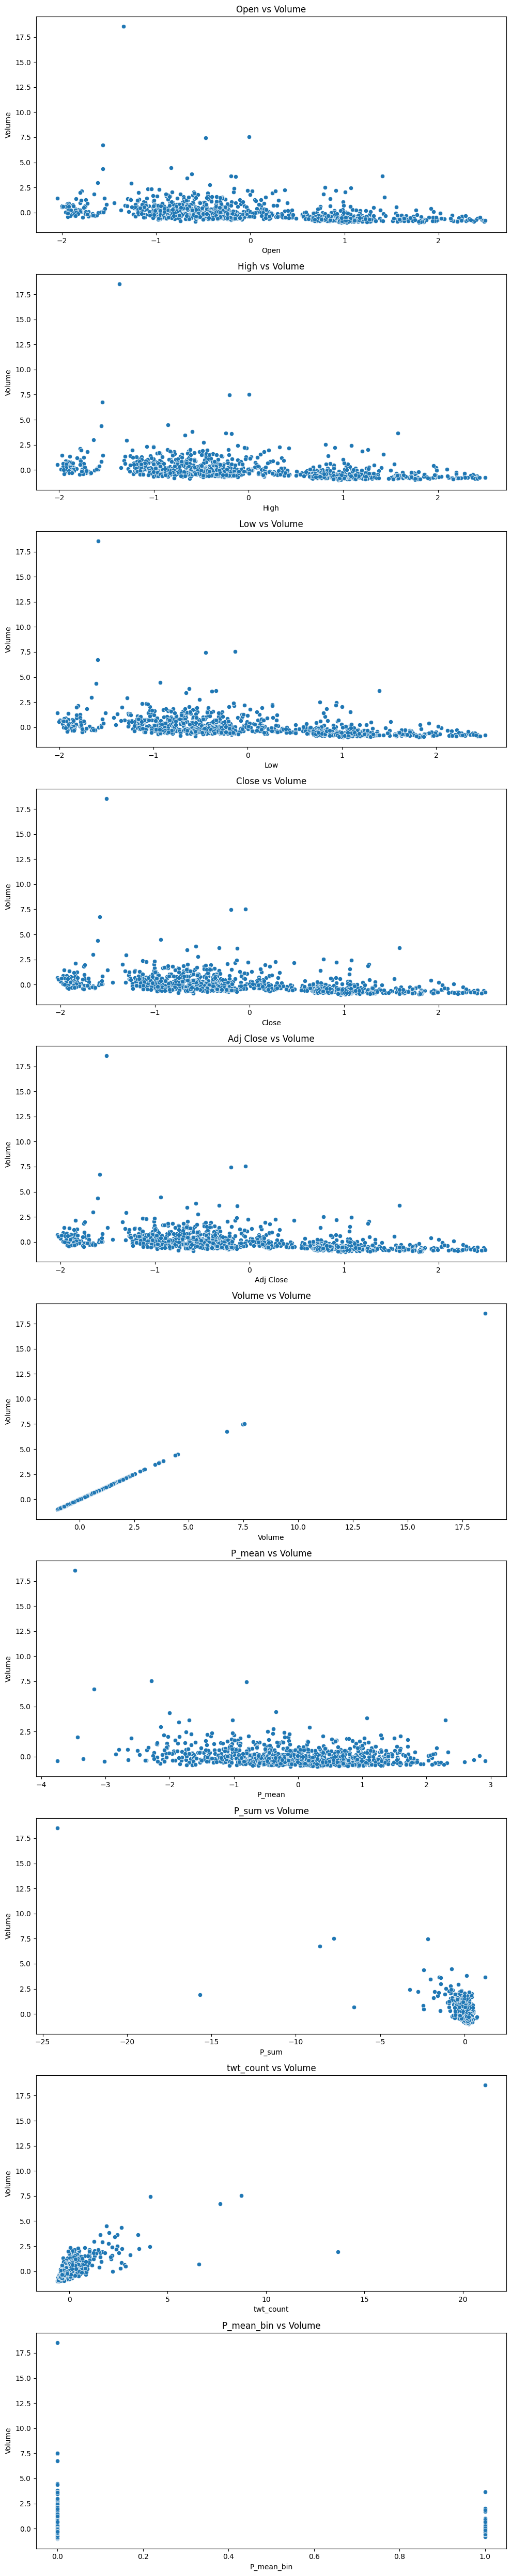

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))

# Loop over each column
for i, col in enumerate(columns):
    # Create scatter plot
    sns.scatterplot(x=data_preprocessed[col], y=data_preprocessed['Volume'], ax=axes[i])
    # Set title
    axes[i].set_title(f'{col} vs Volume')

plt.tight_layout()
plt.show()

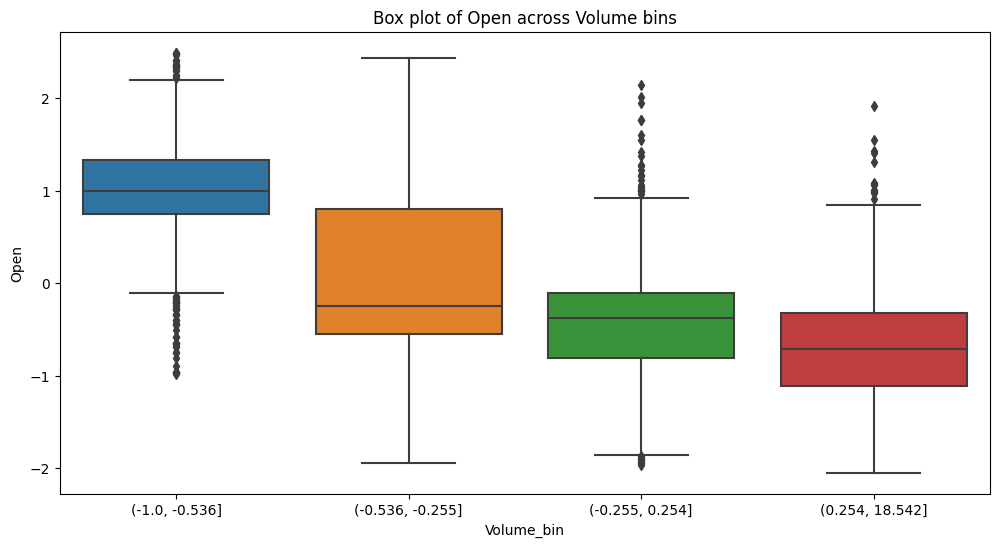

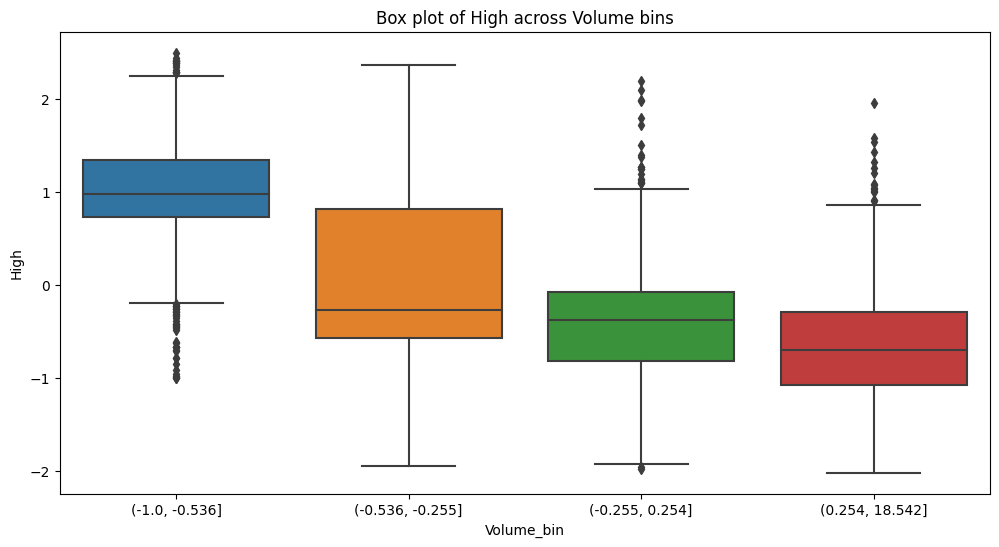

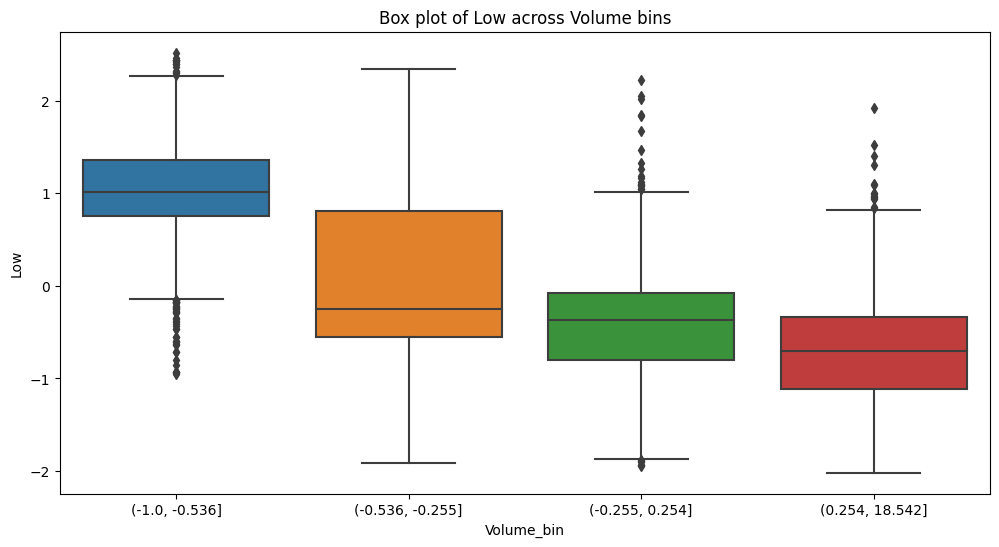

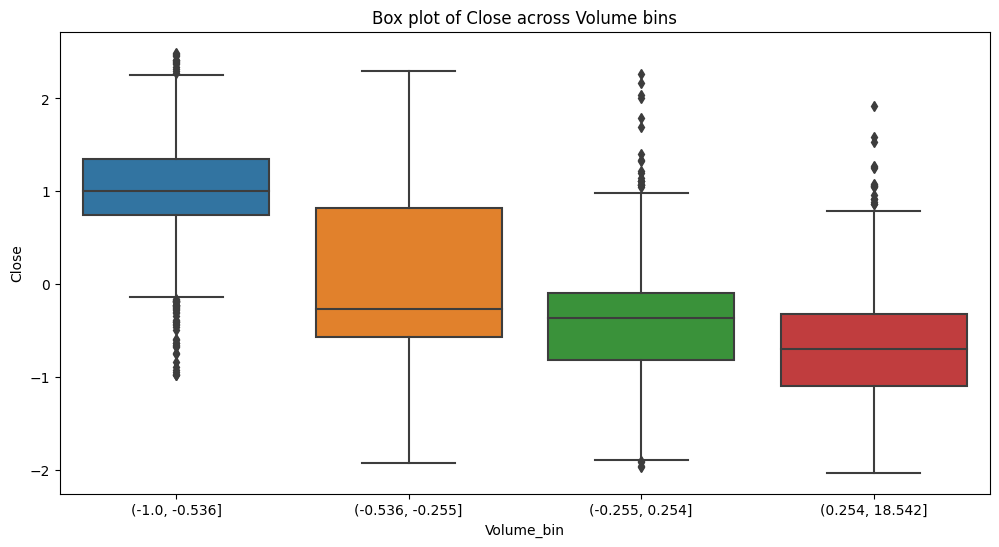

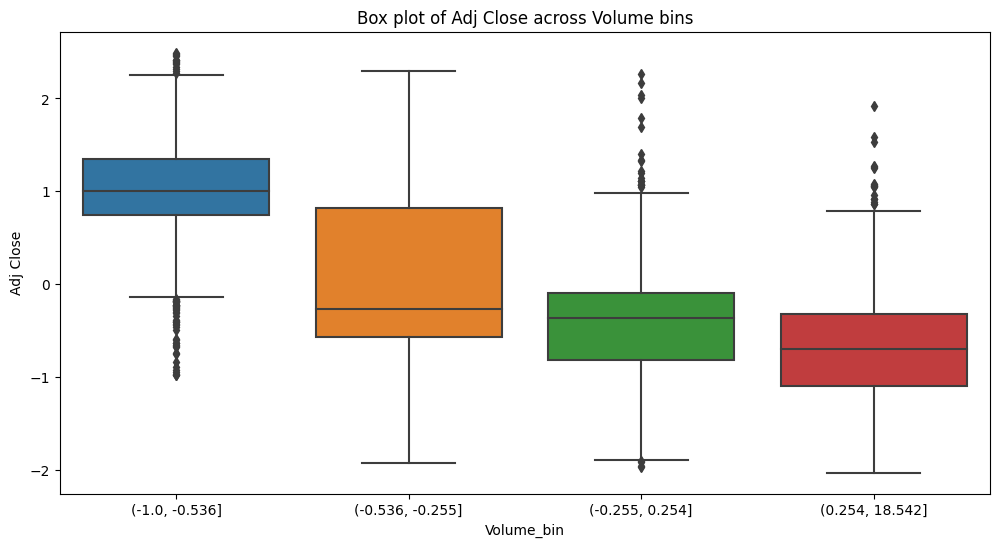

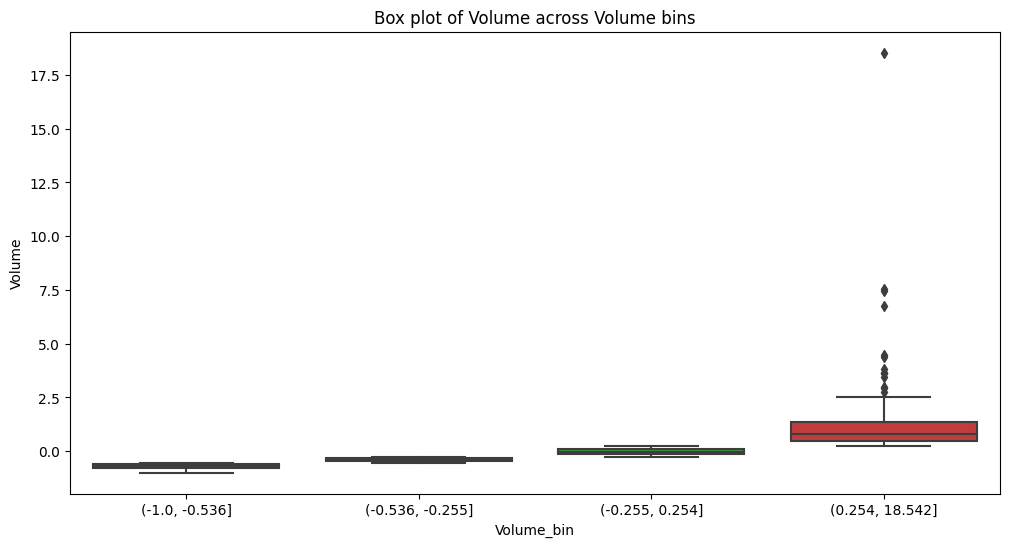

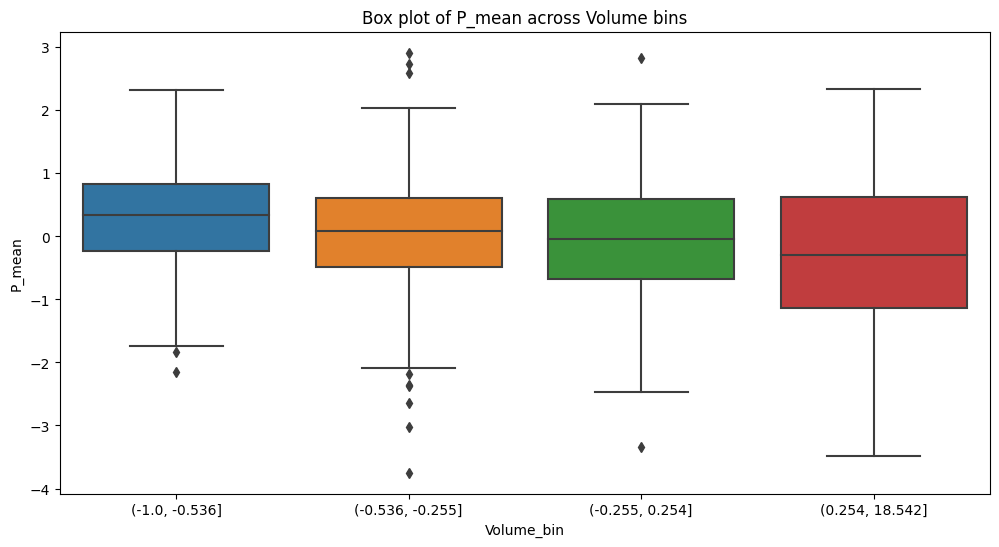

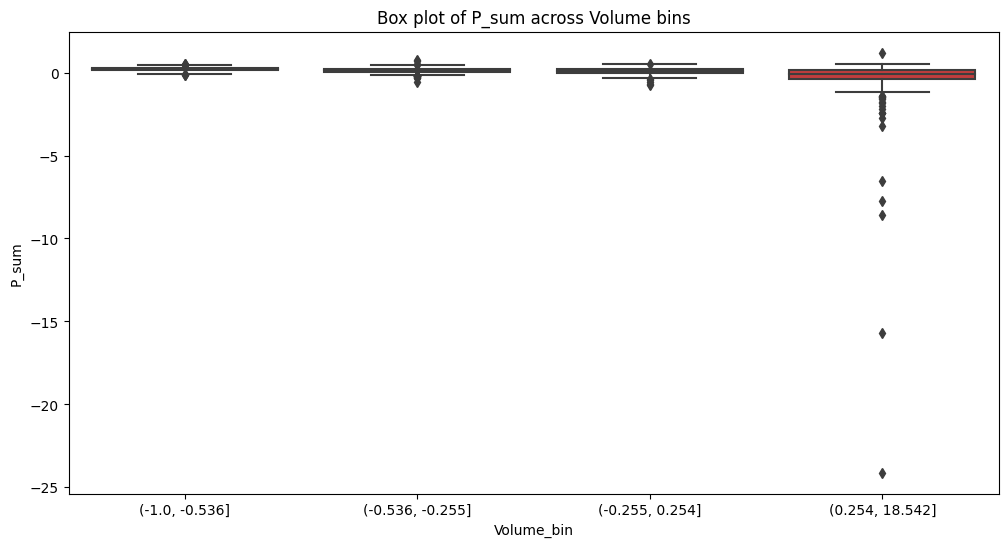

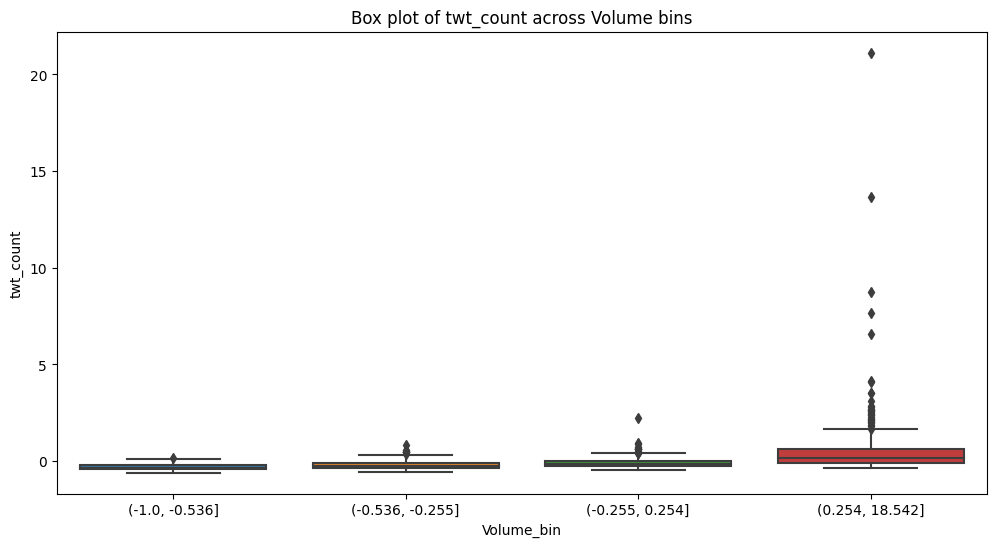

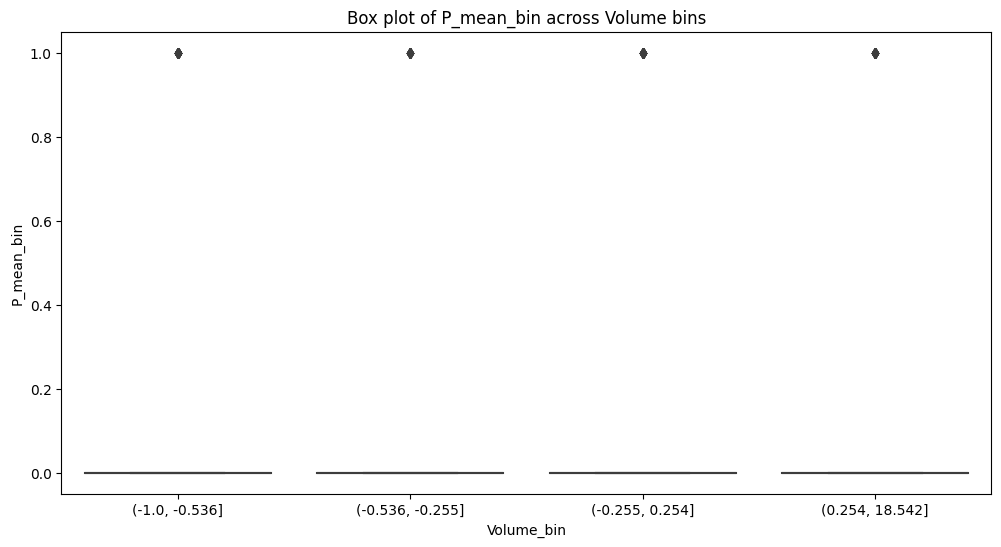

In [ ]:
# Binning the Volume into 4 categories
data_preprocessed['Volume_bin'] = pd.qcut(data_preprocessed['Volume'], q=4)

# Plot boxplots for all features against 'Volume_bin'
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Volume_bin', y=col, data=data_preprocessed)
    plt.title(f'Box plot of {col} across Volume bins')
    plt.show()

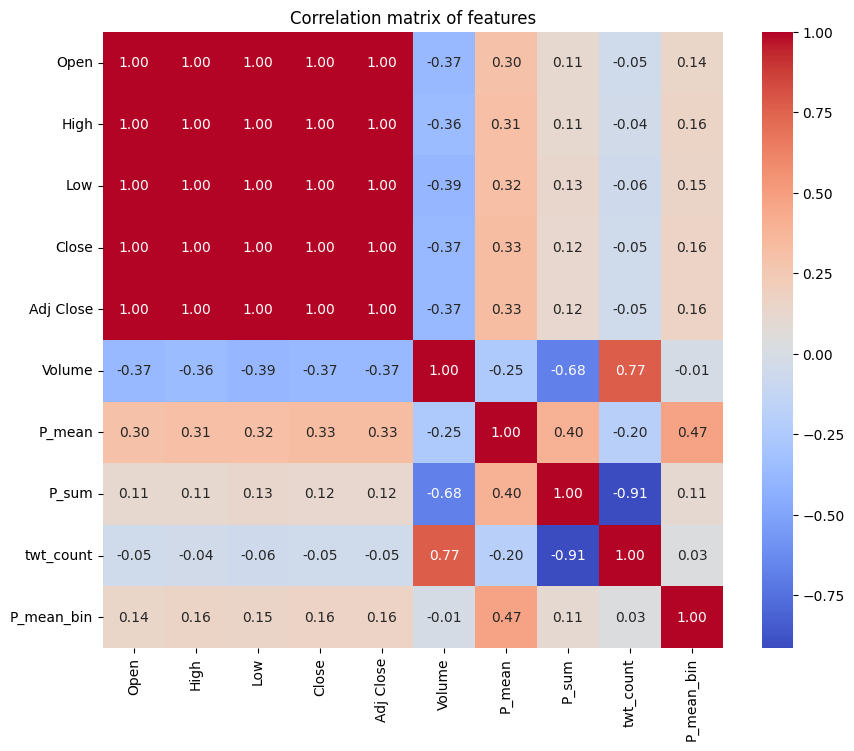

In [ ]:
# Calculate correlation matrix
corr = data_preprocessed[columns].corr()

# Create a figure
plt.figure(figsize=(10, 8))

# Plot a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation matrix of features')

plt.show()

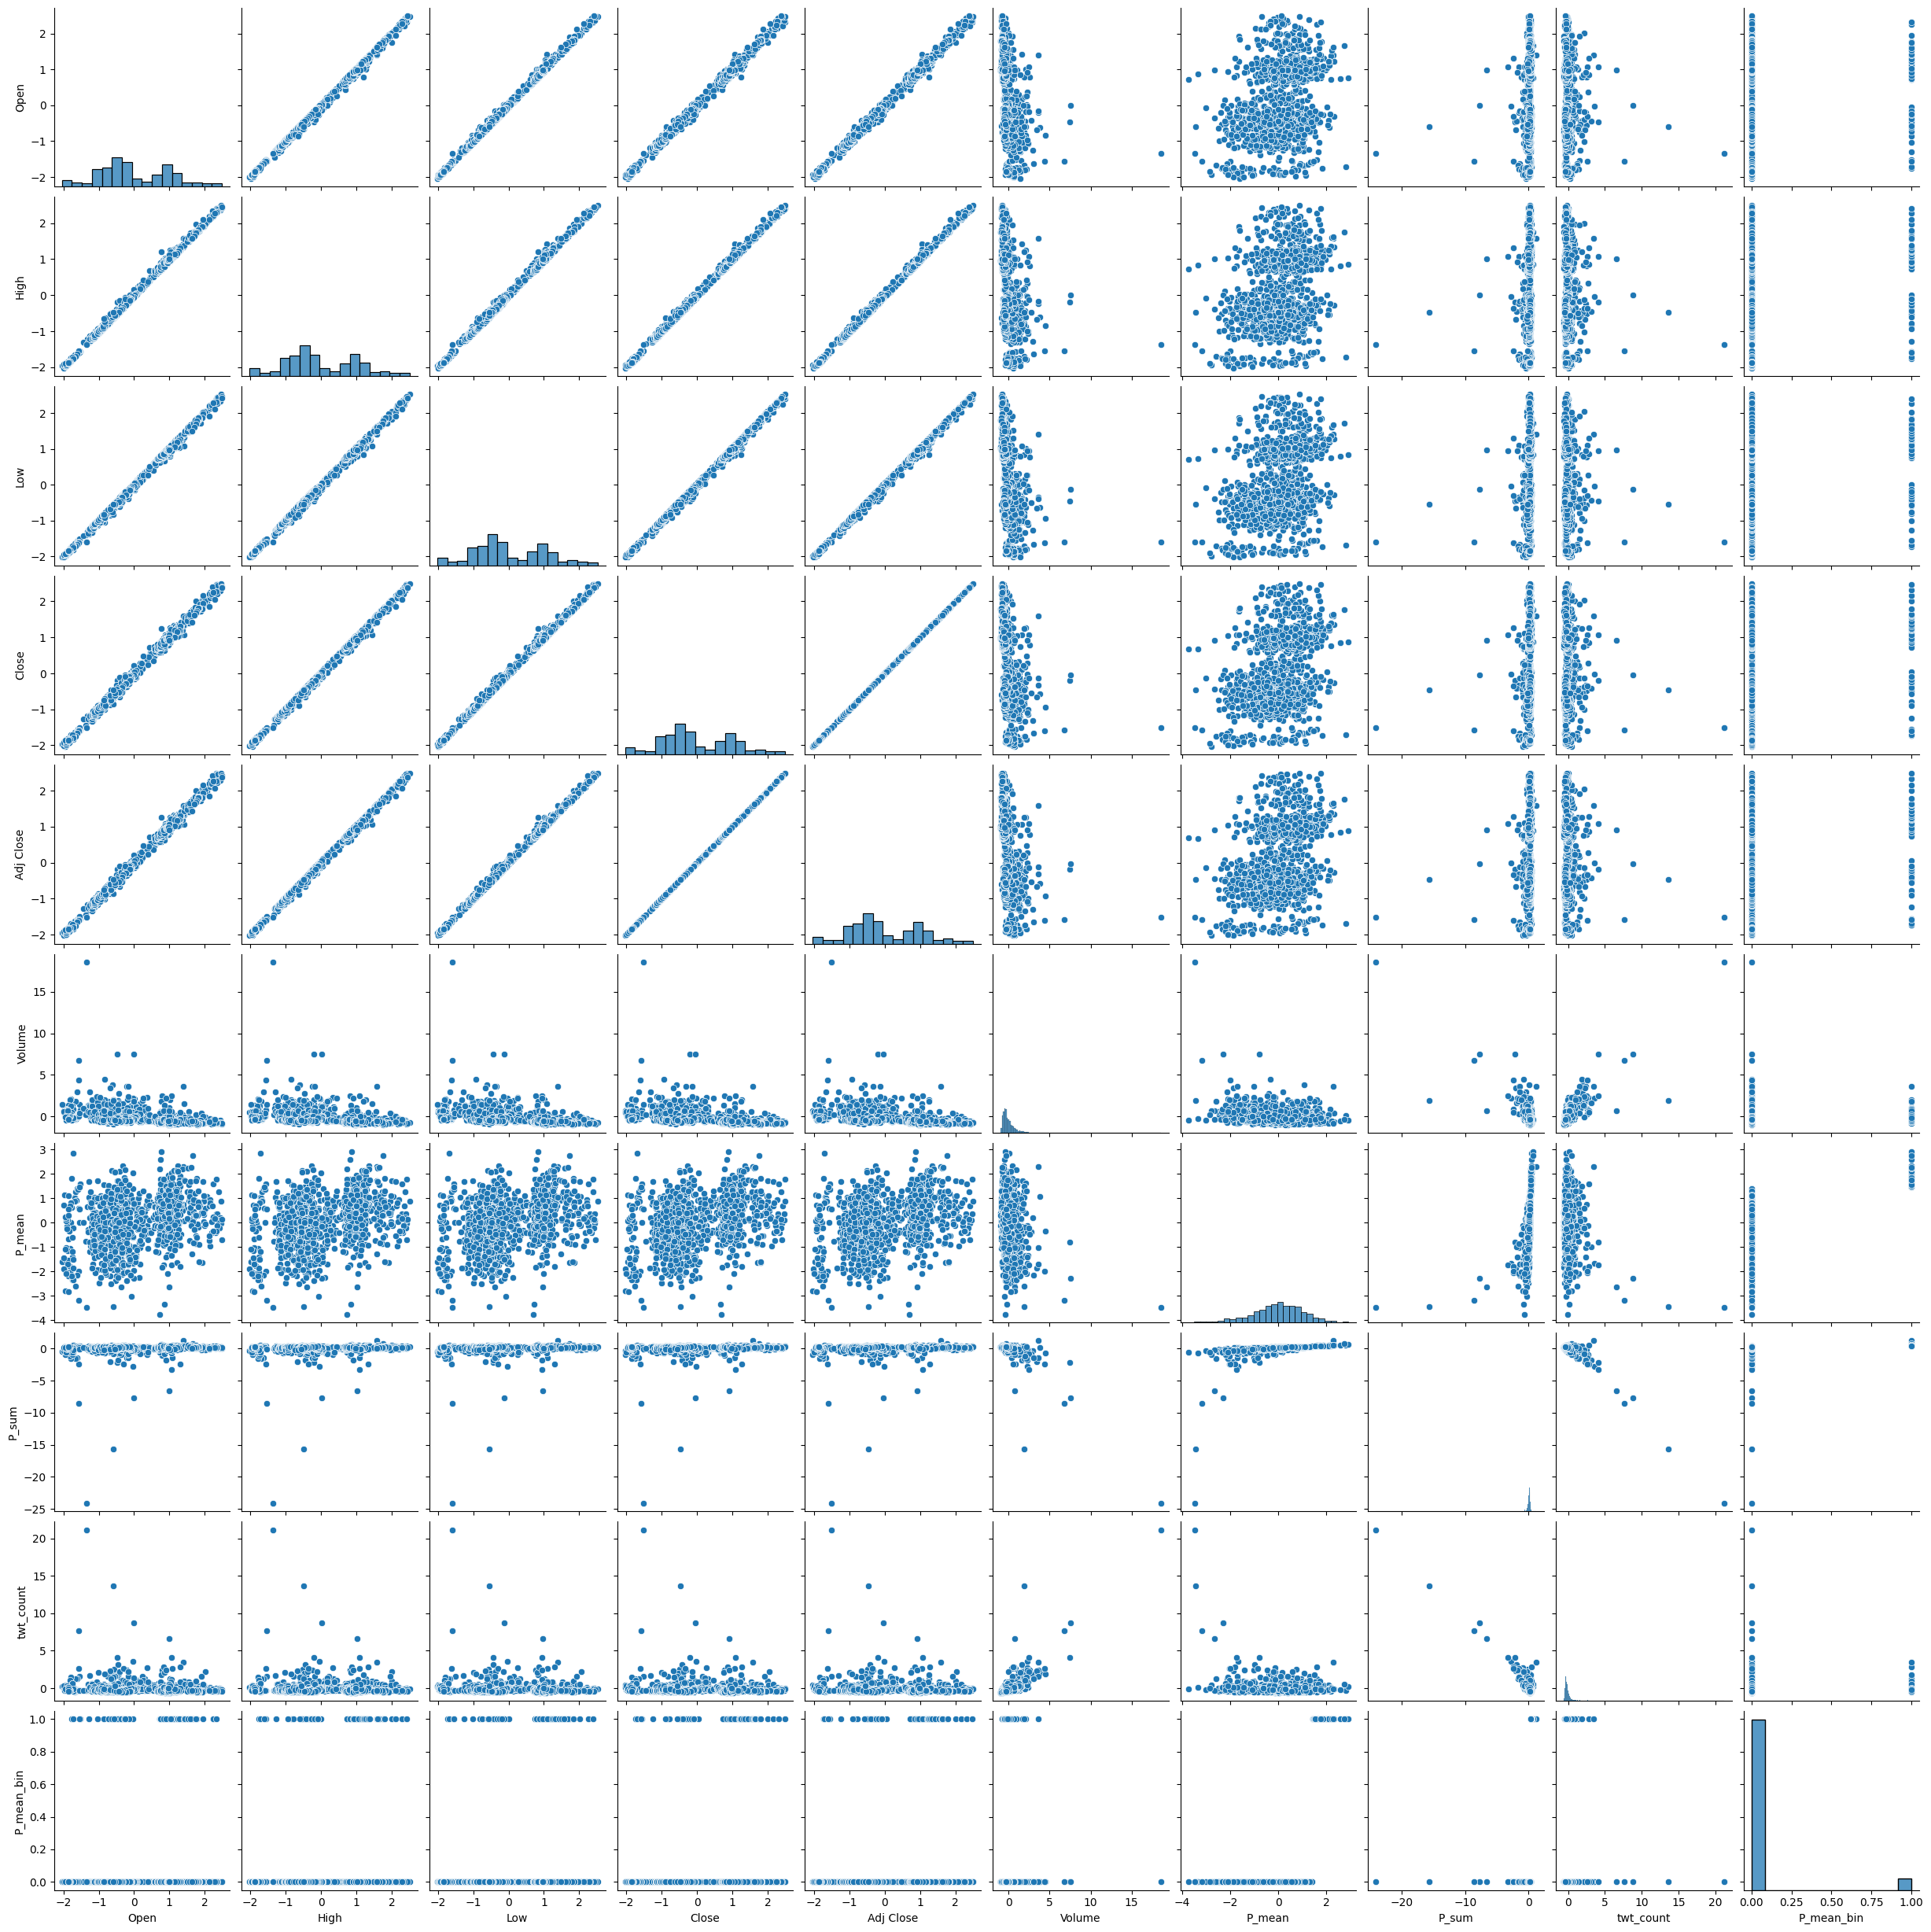

In [ ]:
# Exclude the 'date' and 'Volume_bin' columns for pairplot
columns_for_pairplot = data_preprocessed.columns.drop(['date', 'Volume_bin'])

# Create pairplot
sns.pairplot(data_preprocessed[columns_for_pairplot])

plt.show()

In [ ]:
X['Volume_cat'] = X['Volume_cat'].cat.codes

NameError: ignored

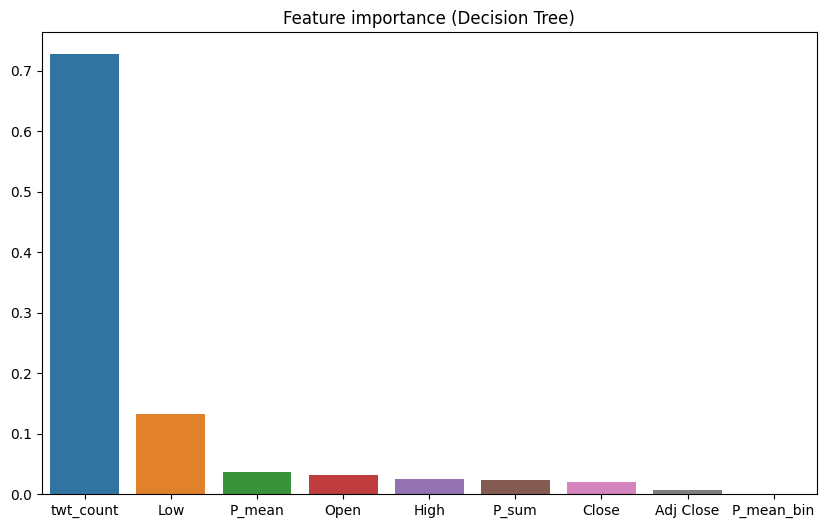

In [ ]:
#There's an issue with the DTR: I can't get the variable types right and I'm too lazy to try. Pretty sure I fucked with the volume too hard. Ended splitting it into four.....
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Define features X and target y
X = data_preprocessed.drop(['date', 'Volume', 'Volume_bin'], axis=1)  # dropping 'date' and 'Volume_bin'
y = data_preprocessed['Volume']

# Fit a decision tree
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X, y)

# Get feature importances
importances = tree.feature_importances_

# Sort features by their importances
sorted_indices = np.argsort(importances)[::-1]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns[sorted_indices], y=importances[sorted_indices])
plt.title('Feature importance (Decision Tree)')
plt.show()

In [ ]:
print(X.dtypes)

Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
P_mean        float64
P_sum         float64
twt_count     float64
P_mean_bin      int64
dtype: object


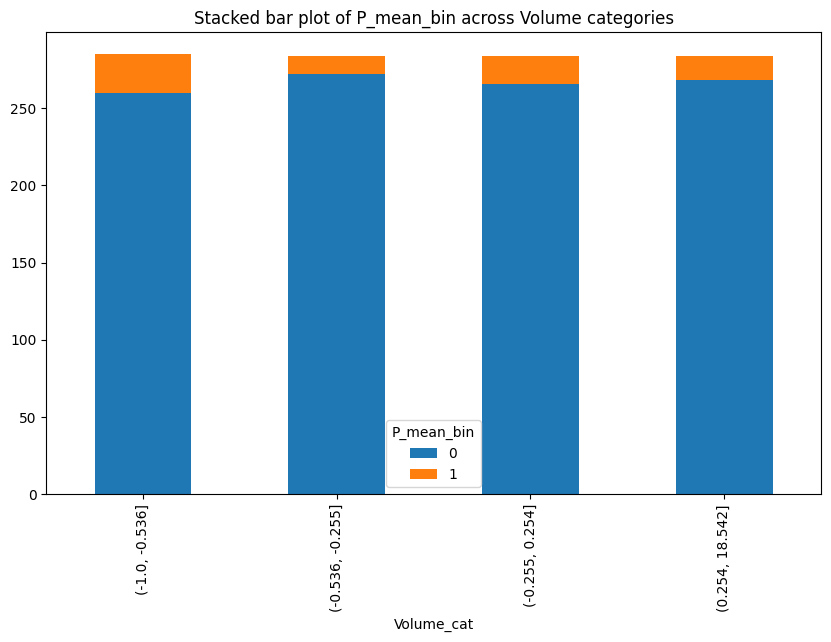

In [ ]:
# Divide 'Volume' into categories
data_preprocessed['Volume_cat'] = pd.qcut(data_preprocessed['Volume'], q=4)

# Create a pivot table
pivot_table = data_preprocessed.groupby(['Volume_cat', 'P_mean_bin']).size().unstack()

# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked bar plot of P_mean_bin across Volume categories')
plt.show()

In [ ]:
# Calculate the absolute correlations with the target variable
correlations = data_standardized.corr()['Volume'].abs()

# Select the top N features
top_features = correlations.nlargest(10)

print(top_features)


NameError: ignored

# **MODEL**


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


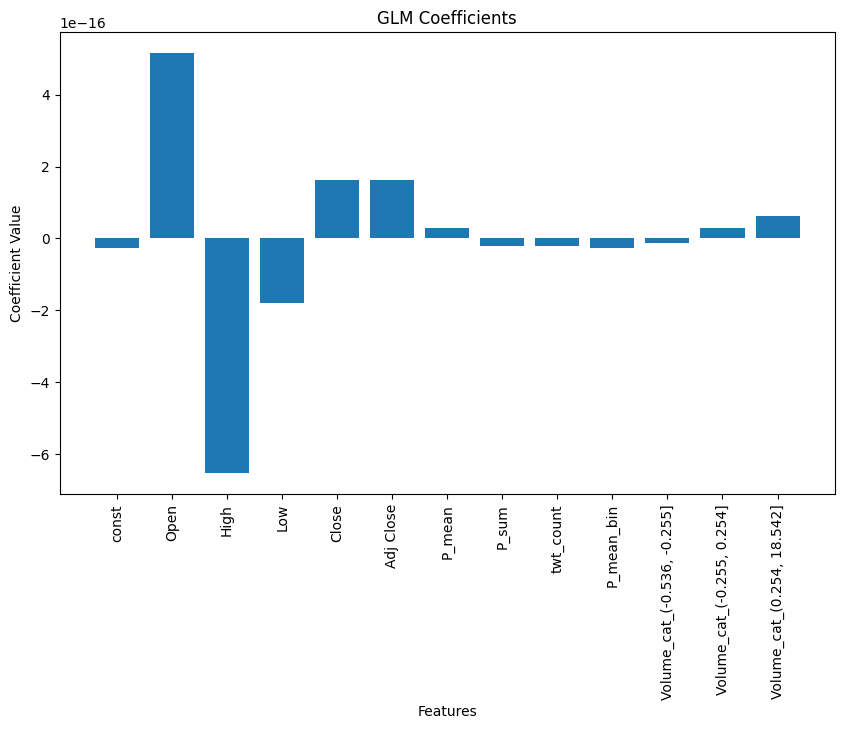

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

X = data_preprocessed.drop(['date', 'Volume', 'Volume_bin'], axis=1)  # dropping 'date' and 'Volume_bin'
y = data_preprocessed['Volume']

#encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

#add constant to the features
X_encoded = sm.add_constant(X_encoded)

#GLM
glm_model = sm.GLM(y, X_encoded, family=sm.families.Gamma())
glm_results = glm_model.fit()

#plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(X_encoded.columns, glm_results.params)
plt.title('GLM Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the predictor variables and the target variable
X = data[['P_mean', 'P_sum', 'twt_count']]
y = data['Close']

# Add a constant column to the predictor variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GLM model on the training data with Gamma family and log link function
glm_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(sm.families.links.log()))
glm_results = glm_model.fit()

# Print the summary of the model
print(glm_results.summary())


NameError: ignored

In [ ]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (228,)
y_pred shape: (1137,)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)


In [ ]:
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("Infinity values in X_train:", np.isinf(X_train).sum().sum())
print("NaN values in y_train:", y_train.isnull().sum())
print("Infinity values in y_train:", np.isinf(y_train).sum())

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('Final_nflx_data_2018-2022.csv')

X = df.drop(['Volume', 'date', 'P_sum','twt_count'], axis=1)
y = df['Volume']

# Add a constant term to the predictor variable for the intercept
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Gamma())  # Assuming Gamma distribution due to positive target variable
glm_results = model.fit()

# Get the predicted values
y_pred = glm_results.predict(X)

rmse = mean_squared_error(y, y_pred, squared=False)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

print(glm_results.summary())



RMSE: 10233544.345105307
MSE: 104725429863236.81
MAE: 3449881.872961929
R-squared: -1.2868263301477127
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                 1137
Model:                            GLM   Df Residuals:                     1131
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                         0.30396
Method:                          IRLS   Log-Likelihood:                -19055.
Date:                Tue, 27 Jun 2023   Deviance:                       490.09
Time:                        16:02:59   Pearson chi2:                     344.
No. Iterations:                    40   Pseudo R-squ. (CS):            -0.1293
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('Final_nflx_data_2018-2022.csv')

X = df['twt_count']
y = df['Volume']

# Add a constant term to the predictor variable for the intercept
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Gamma())  # Assuming Gamma distribution due to positive target variable
glm_results = model.fit()

# Get the predicted values
y_pred = glm_results.predict(X)

rmse = mean_squared_error(y, y_pred, squared=False)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

print(glm_results.summary())



RMSE: 222568058.35848182
MSE: 4.953654060146457e+16
MAE: 13430363.508574458
R-squared: -1080.6996931862402
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                 1137
Model:                            GLM   Df Residuals:                     1135
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                          4472.2
Method:                          IRLS   Log-Likelihood:                -27388.
Date:                Tue, 27 Jun 2023   Deviance:                       1289.7
Time:                        15:59:41   Pearson chi2:                 5.08e+06
No. Iterations:                    33   Pseudo R-squ. (CS):          -0.001823
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Running a decision tree


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('Final_nflx_data_2018-2022.csv', delimiter=',')

# Preprocessing: Remove date column, as DecisionTreeRegressor cannot handle it
data = data.drop(['date'], axis=1)

# Set the target column
target = 'Volume'

# Split data into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train RMSE: 0.0
Test RMSE: 3953278.2628982123


obviously overfitting, trying feature selection using built in "feature importance"


In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01401
Feature: 1, Score: 0.01332
Feature: 2, Score: 0.16531
Feature: 3, Score: 0.01242
Feature: 4, Score: 0.00910
Feature: 5, Score: 0.01483
Feature: 6, Score: 0.01278
Feature: 7, Score: 0.75823


In [ ]:
#using only feature 2 and feature 7 (highest scores) to do our model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Selecting features
X = data[['Low', 'P_sum']]
y = data['Volume']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Regressor and fitting the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predicting for training set
train_preds = model.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_train, train_preds))

# Predicting for test set
test_preds = model.predict(X_test)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))

# Printing RMSE
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 34844.49574019315
Test RMSE: 5670303.86962283


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predicting for training set
train_preds = model.predict(X_train)

# Computing metrics for training set
train_mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Printing metrics for training set
print('Train MSE:', train_mse)
print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train R-Squared:', train_r2)

# Predicting for test set
test_preds = model.predict(X_test)

# Computing metrics for test set
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Printing metrics for test set
print('Test MSE:', test_mse)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test R-Squared:', test_r2)

Train MSE: 1214138883.3883388
Train RMSE: 34844.49574019315
Train MAE: 1634.4334433443344
Train R-Squared: 0.9999748083626837
Test MSE: 32152345973859.65
Test RMSE: 5670303.86962283
Test MAE: 3442893.8596491227
Test R-Squared: 0.11236408381080798


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating the Random Forest Regressor and fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting for training set
train_preds = model.predict(X_train)

# Computing metrics for training set
train_mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Printing metrics for training set
print('Train MSE:', train_mse)
print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train R-Squared:', train_r2)

# Predicting for test set
test_preds = model.predict(X_test)

# Computing metrics for test set
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Printing metrics for test set
print('Test MSE:', test_mse)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test R-Squared:', test_r2)

Train MSE: 3092594880419.803
Train RMSE: 1758577.5161817016
Train MAE: 999673.6081224789
Train R-Squared: 0.9358330997716265
Test MSE: 25545457314540.258
Test RMSE: 5054251.409906344
Test MAE: 2761365.9791666665
Test R-Squared: 0.2947617126818983


still overfitting but w/e

In [ ]:
# Print feature importance
importances = model.feature_importances_
for i, j in enumerate(importances):
    print('Feature: ', i, ', Score: ', j)

Feature:  0 , Score:  0.26086463658572423
Feature:  1 , Score:  0.7391353634142759


lets try a random forest model since random forest regressor did decently

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

data2 = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Convert 'date' column to datetime
data2['date'] = pd.to_datetime(data2['date'])
# Extract numerical features from 'date'
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day
# Now we can drop 'date' column
data2 = data2.drop(['date'], axis=1)

# Define target variable
target = 'Volume'

# Define features and target
X = data2.drop(target, axis=1)
y = data2[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Calculate and print Train and Test metrics
print('Train RMSE:', sqrt(mean_squared_error(y_train, pred_train)))
print('Train MSE:', mean_squared_error(y_train, pred_train))
print('Train MAE:', mean_absolute_error(y_train, pred_train))
print('Train R-squared:', r2_score(y_train, pred_train))

print('Test RMSE:', sqrt(mean_squared_error(y_test, pred_test)))
print('Test MSE:', mean_squared_error(y_test, pred_test))
print('Test MAE:', mean_absolute_error(y_test, pred_test))
print('Test R-squared:', r2_score(y_test, pred_test))

Train RMSE: 1437702.708374518
Train MSE: 2066989077667.4246
Train MAE: 646233.807480748
Train R-squared: 0.9571129465551533
Test RMSE: 3984340.368279889
Test MSE: 15874968170304.725
Test MAE: 1728969.0131578948
Test R-squared: 0.5617367414564695


In [ ]:
#Light GBM

import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for the LightGBM model
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate performance metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics for training and test sets
print('Training Set:')
print('MSE:', train_mse)
print('RMSE:', train_rmse)
print('MAE:', train_mae)
print('R-Squared:', train_r2)
print('')

print('Test Set:')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,  # Increase L1 regularization
    'lambda_l2': 0.1,  # Increase L2 regularization
    'min_data_in_leaf': 20,  # Increase minimum number of samples in a leaf
    'verbose': 0
}

# Train the LightGBM model with early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data],
    early_stopping_rounds=10,  # Stop training if no improvement in 10 rounds
    verbose_eval=10
)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	training's l2: 2.66

Best Hyperparameters: {'n_neighbors': 3}
MSE: 1951157431851.852
RMSE: 1396838.3699812416
MAE: 755957.3099415203
R-Squared: 0.9461340265478841
Accuracy: 0.9736842105263158
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1 Score: 0.9433962264150944


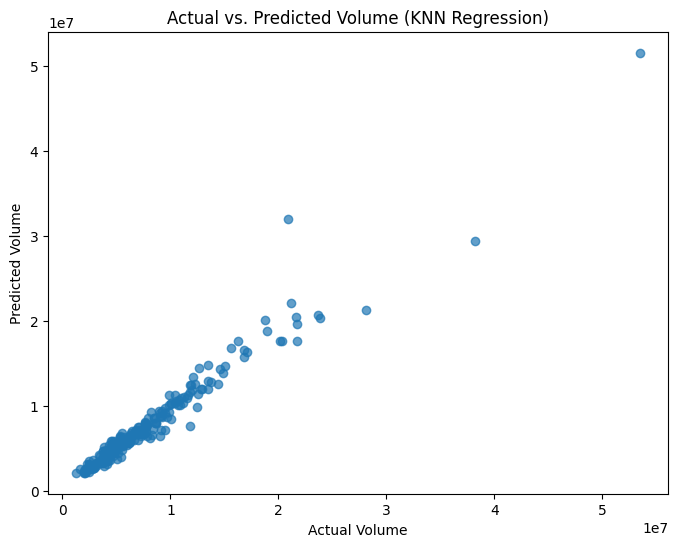

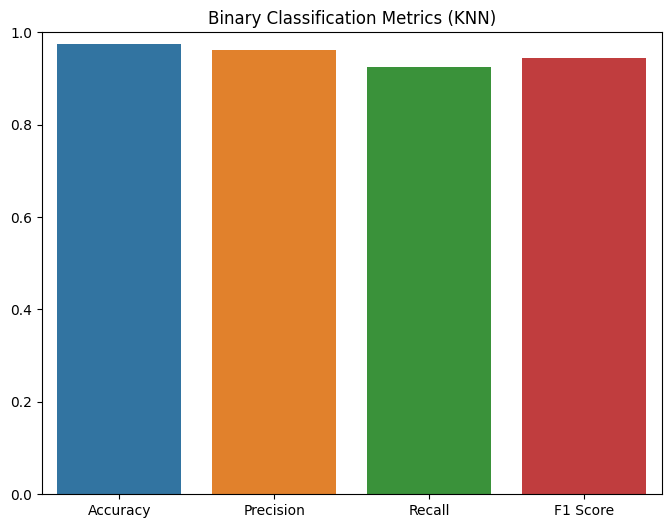

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the KNN model
knn_model = KNeighborsRegressor()

# Define a range of hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]  # You can adjust this range based on your dataset and problem
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Convert regression predictions to binary labels using a threshold
threshold = 9900000  # Adjust the threshold as needed
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate performance metrics for binary classification
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Print the performance metrics for regression
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

# Print the performance metrics for binary classification
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Scatter plot for regression: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs. Predicted Volume (KNN Regression)')
plt.show()

# Bar plot for binary classification metrics
class_metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                 'Score': [accuracy, precision, recall, f1]}
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=class_metrics)
plt.ylim(0, 1.0)
plt.title('Binary Classification Metrics (KNN)')
plt.show()



Best Hyperparameters: {'p': 2, 'n_neighbors': 5}
MSE: 2742605937835.088
RMSE: 1656081.5009639736
MAE: 829119.649122807
R-Squared: 0.9242843574663137
Accuracy: 0.9692982456140351
Precision: 0.96
Recall: 0.9056603773584906
F1 Score: 0.9320388349514563


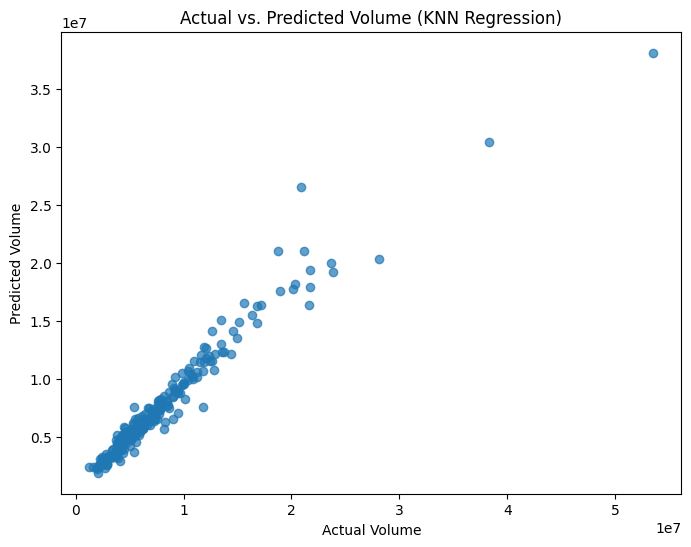

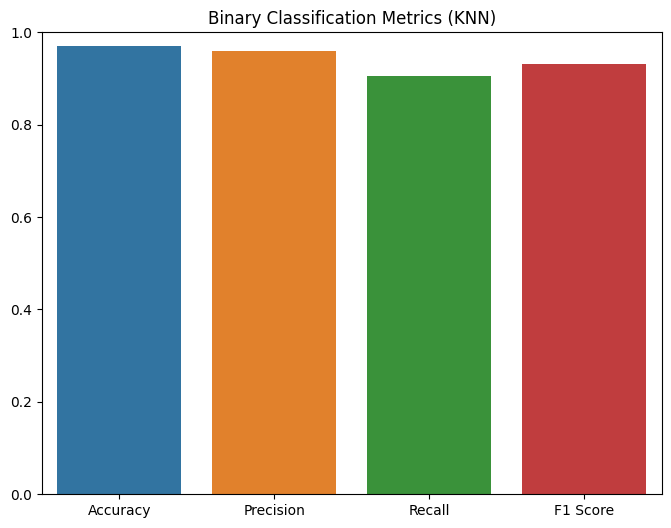

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the KNN model
knn_model = KNeighborsRegressor()

# Define a range of hyperparameters to sample from
param_dist = {
    'n_neighbors': np.arange(1, 21),  # Range of k values (1 to 20)
    'p': [1, 2],  # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initialize Random Search with cross-validation
random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Random Search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_knn_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Convert regression predictions to binary labels using a threshold
threshold = 10000000  # Adjust the threshold as needed
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate performance metrics for binary classification
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Print the performance metrics for regression
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

# Print the performance metrics for binary classification
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Scatter plot for regression: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs. Predicted Volume (KNN Regression)')
plt.show()

# Bar plot for binary classification metrics
class_metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                 'Score': [accuracy, precision, recall, f1]}
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=class_metrics)
plt.ylim(0, 1.0)
plt.title('Binary Classification Metrics (KNN)')
plt.show()


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Best Hyperparameters: OrderedDict([('n_neighbors', 1), ('p', 2)])
MSE: 8441005892587.72
RMSE: 2905340.925362757
MAE: 1088032.894736842
R-Squared: 0.7669675486473982
Accuracy: 0.956140350877193
Precision: 0.9215686274509803
Recall: 0.8867924528301887
F1 Score: 0.9038461538461539


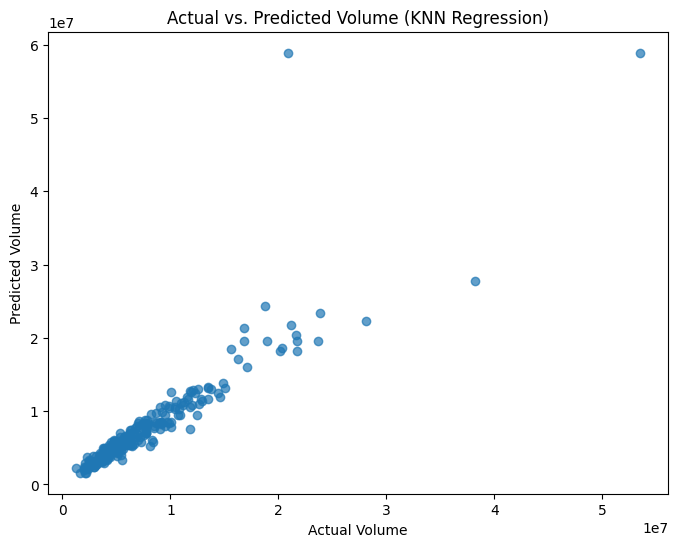

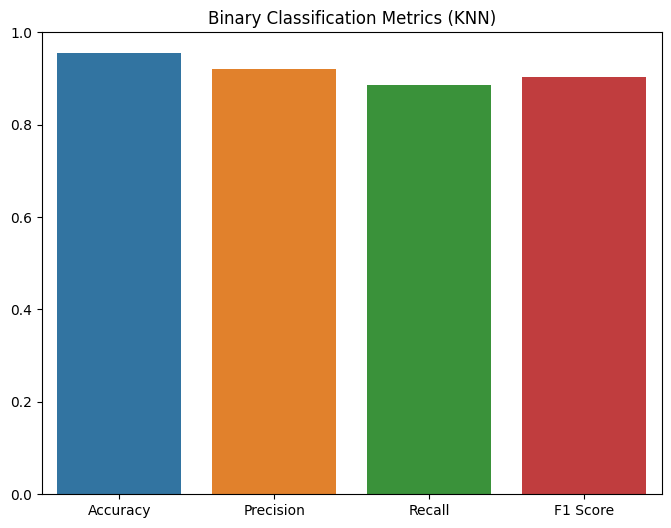

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the KNN model
knn_model = KNeighborsRegressor()

# Define a search space for hyperparameter tuning
param_space = {
    'n_neighbors': (1, 20),  # Range of k values (1 to 20)
    'p': (1, 2),  # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initialize Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(knn_model, param_space, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Bayesian Optimization to find the best hyperparameters
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = bayes_search.best_params_
best_knn_model = bayes_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Convert regression predictions to binary labels using a threshold
threshold = 10000000  # Adjust the threshold as needed
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate performance metrics for binary classification
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Print the performance metrics for regression
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

# Print the performance metrics for binary classification
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Scatter plot for regression: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs. Predicted Volume (KNN Regression)')
plt.show()

# Bar plot for binary classification metrics
class_metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                 'Score': [accuracy, precision, recall, f1]}
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=class_metrics)
plt.ylim(0, 1.0)
plt.title('Binary Classification Metrics (KNN)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Feature Engineering
# Moving Averages
data['Volume_MA_5'] = data['Volume'].rolling(window=5).mean()
data['Volume_MA_10'] = data['Volume'].rolling(window=10).mean()

# Technical Indicators
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Volatility Measures
data['Volatility'] = data['Close'].pct_change().rolling(window=10).std()

# Drop rows with NaN values resulted from rolling windows
data.dropna(inplace=True)

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count', 'Volume_MA_5', 'Volume_MA_10', 'RSI', 'Volatility']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the KNN model
knn_model = KNeighborsRegressor()

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics for regression
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)


MSE: 6324221788092.035
RMSE: 2514800.5463837553
MAE: 1320547.0796460176
R-Squared: 0.8342837506051185


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Feature Engineering
# Moving Averages
data['Volume_MA_5'] = data['Volume'].rolling(window=5).mean()
data['Volume_MA_10'] = data['Volume'].rolling(window=10).mean()

# Technical Indicators
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Volatility Measures
data['Volatility'] = data['Close'].pct_change().rolling(window=10).std()

# Drop rows with NaN values resulted from rolling windows
data.dropna(inplace=True)

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count', 'Volume_MA_5', 'Volume_MA_10', 'RSI', 'Volatility']]
target = data['Volume']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics for regression
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)


MSE: 3201176766686.5293
RMSE: 1789183.2680545973
MAE: 427117.566985608
R-Squared: 0.9161182157741231


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

# Load the data from the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Feature Engineering
# Moving Averages
data['Volume_MA_5'] = data['Volume'].rolling(window=5).mean()
data['Volume_MA_10'] = data['Volume'].rolling(window=10).mean()

# Technical Indicators
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Volatility Measures
data['Volatility'] = data['Close'].pct_change().rolling(window=10).std()

# Drop rows with NaN values resulted from rolling windows
data.dropna(inplace=True)

# Extract the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count', 'Volume_MA_5', 'Volume_MA_10', 'RSI', 'Volatility']]
target = data['P_mean_bin']  # Use P_mean_bin as the target for binary classification

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the LightGBM classifier model
lgb_model = lgb.LGBMClassifier()

# Train the LightGBM classifier model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Calculate evaluation metrics for binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for binary classification
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


KeyError: ignored

SVM below


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Select the features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']]
target = data['Volume']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the SVM regression model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-Squared:', r2)

Mean Squared Error (MSE): 39350054785371.02
Root Mean Squared Error (RMSE): 6272962.201812715
Mean Absolute Error (MAE): 3737470.8907735446
R-Squared: -0.08634442910962514


Hyperperameter tuning for SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']]
y = data['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.3]
}

# Perform Grid Search
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = grid_search.predict(X_test_scaled)

# Print Metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-Squared:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mean Squared Error (MSE): 39301084890370.55
Root Mean Squared Error (RMSE): 6269057.735447214
Mean Absolute Error (MAE): 3726785.2400492392
R-Squared: -0.08499250792633783


looks really bad, potentially due to:
SVM might be inapprorpriate to use: it makes assumptions about the data, trying to make patterns: fundamentally, these patterns might not match with our data.

feature relevance: features we have might not contain enough info to predict target accurately

Hyperameter range: I'm still playing around with this

data preprocessing issue? (unlikely)

problem complexity

Lets try scaling data and also using a larger range for the hyperparamters

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read data
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Selecting the features and target variable
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']]
y = data['Volume'] # replace with your target variable name

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4] # only used if kernel='poly'
}

# Instantiating the model
svr = SVR()

# Grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Prediction
y_pred = grid_search.predict(X_test_scaled)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared:", r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Squared Error (MSE): 39108825487455.12
Root Mean Squared Error (RMSE): 6253704.940869462
Mean Absolute Error (MAE): 3739708.2432895186
R-Squared: -0.07968476610894215


slight improvement

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform

# Read data
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Selecting the features and target variable
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'P_mean', 'P_sum', 'twt_count']]
y = data['Volume'] # replace with your target variable name

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining hyperparameter distribution
param_distributions = {
    'C': uniform(0.1, 100),
    'epsilon': uniform(0.01, 1),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4] # only used if kernel='poly'
}

# Instantiating the model
svr = SVR()

# Random search with cross-validation
random_search = RandomizedSearchCV(svr, param_distributions, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Prediction
y_pred = random_search.predict(X_test_scaled)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared:", r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Squared Error (MSE): 38650366592742.48
Root Mean Squared Error (RMSE): 6216941.900383377
Mean Absolute Error (MAE): 3727991.5669981837
R-Squared: -0.06702800441030332


I think this is the best SVM can do


herirachical clustering

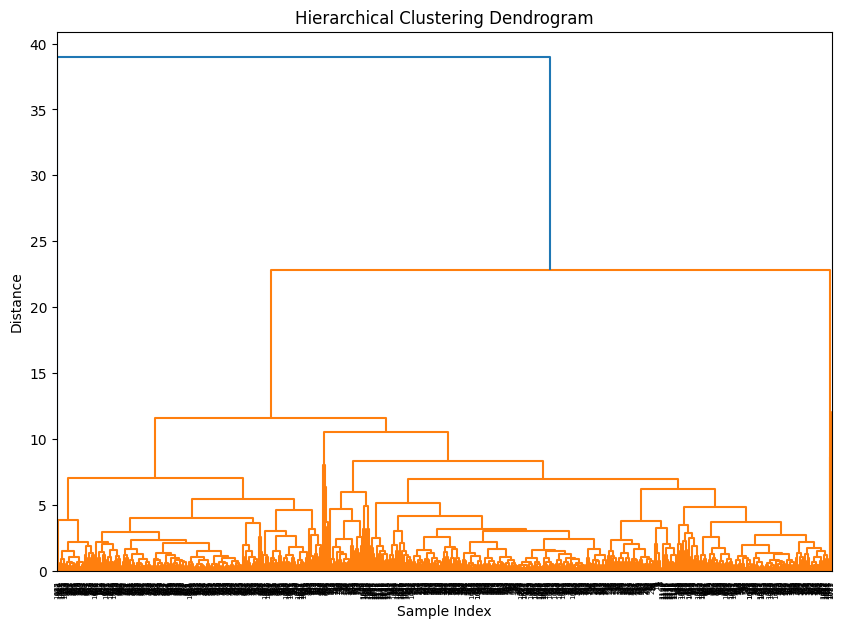

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Assuming your data is loaded into 'data'
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'P_mean', 'P_sum', 'twt_count']]  # Adjust as needed

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering
Z = linkage(scaled_features, method='complete')  # complete linkage used

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Choose the distance to cut the dendrogram (e.g., 25 for three clusters)
cut_distance = 10

clusters = fcluster(Z, cut_distance, criterion='distance')

# Add the cluster labels to your original data
data['Cluster'] = clusters

# You can now analyze the clusters by examining the data in each group
for cluster_num in set(clusters):
    print(f"Cluster {cluster_num}:")
    print(data[data['Cluster'] == cluster_num])

Cluster 1:
           date        Open        High         Low       Close   Adj Close  \
599   5/20/2020  454.250000  455.809998  444.000000  447.670013  447.670013   
621   6/22/2020  455.010010  468.589996  454.209991  468.040009  468.040009   
622   6/23/2020  466.500000  474.010010  464.500000  466.260010  466.260010   
624   6/25/2020  458.859985  467.010010  454.000000  465.910004  465.910004   
628    7/1/2020  454.000000  488.230011  454.000000  485.640015  485.640015   
...         ...         ...         ...         ...         ...         ...   
1015  1/12/2022  544.270020  544.270020  532.020020  537.219971  537.219971   
1016  1/13/2022  537.059998  540.789978  518.260010  519.200012  519.200012   
1017  1/14/2022  517.599976  538.369995  511.880005  525.690002  525.690002   
1018  1/18/2022  520.080017  521.750000  508.679993  510.799988  510.799988   
1019  1/19/2022  515.000000  523.210022  510.510010  515.859985  515.859985   

       Volume    P_mean  P_sum  twt_coun

In [ ]:
for cluster_num in data['Cluster'].unique():
    print(f"Cluster {cluster_num} Summary:")
    print(data[data['Cluster'] == cluster_num].describe())


Cluster 3 Summary:
             Open        High         Low       Close   Adj Close  \
count  734.000000  734.000000  734.000000  734.000000  734.000000   
mean   328.829810  334.399264  322.795231  328.814305  328.814305   
std     61.716336   62.106237   60.968117   61.553255   61.553255   
min    163.960007  172.059998  162.710007  166.369995  166.369995   
25%    293.570007  297.897492  288.112496  293.152496  293.152496   
50%    339.945007  345.684998  334.314987  339.215012  339.215012   
75%    367.927498  373.385003  362.165001  367.709999  367.709999   
max    468.540009  472.359985  454.000000  457.850006  457.850006   

             Volume      P_mean       P_sum    twt_count  Cluster  
count  7.340000e+02  734.000000  734.000000   734.000000    734.0  
mean   9.231598e+06   -0.080021  -38.750681   462.742507      3.0  
std    5.048045e+06    0.048424   41.074706   276.348931      0.0  
min    2.019300e+06   -0.221591 -382.000000   173.000000      3.0  
25%    5.635525e+06

Cluster 3: With 734 observations, this cluster appears to represent the bulk of the data. The mean values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' are roughly between 328 to 334. There's a considerable variation in these values as the standard deviation is around 61. 'P_mean' and 'P_sum' are negative on average, indicating some specific characteristic or pattern in this cluster.

Cluster 2: This cluster consists of only 9 observations but with higher mean values for 'Open', 'High', 'Low', 'Close', and 'Adj Close', compared to Cluster 3. The mean volume here is also considerably higher, and the average 'twt_count' is substantially greater.

Cluster 1: With 389 observations, this cluster has mean values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' around the 539-546 range. This cluster appears to have characteristics in between Cluster 3 and Cluster 2 regarding these variables.

Cluster 4: This small cluster of 3 observations shows the highest mean 'Volume' and 'twt_count'. The 'Open', 'High', 'Low', 'Close', and 'Adj Close' values are relatively lower, and the 'P_mean' and 'P_sum' values are negative and relatively large in magnitude, pointing towards specific patterns or anomalies.

Cluster 5 and 6: These clusters contain only 1 observation each, representing unique or outlier cases within the dataset. Cluster 5 has a very high 'twt_count' and negative 'P_mean' and 'P_sum', whereas the values for 'Open', 'High', 'Low', 'Close', and 'Adj Close' in Cluster 6 are the lowest among all clusters.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data.drop(columns=['date', 'Cluster']), data['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.3216045966916914


silhouetter values range from -1 to 1. 1 is better

XGBoost model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Preprocessing: Remove date column, as DecisionTreeRegressor cannot handle it
data = data.drop(['date'], axis=1)


In [ ]:
# Binarize the 'P_mean' column to create values of 0 and 1 threshold at 0,
data['P_mean_bin'] = (data['P_mean'] > 0).astype(int)

In [ ]:
# Summary statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean    402.212181   408.380897   395.573237   402.128012   402.128012   
std     116.443388   117.223957   115.429014   116.216659   116.216659   
min     163.960007   172.059998   162.710007   166.369995   166.369995   
25%     319.880005   325.369995   313.500000   319.959991   319.959991   
50%     370.260010   375.899994   363.329987   369.609985   369.609985   
75%     502.339996   508.549988   495.000000   502.109985   502.109985   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume       P_mean        P_sum     twt_count   P_mean_bin  
count  1.137000e+03  1137.000000  1137.000000   1137.000000  1137.000000  
mean   7.906694e+06    -0.070298   -40.118734    491.086192     0.062445  
std    6.770185e+06     0.050140   124.198738    564.227246     0.242069  
min    1.144000e+06    -0.258065 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Define your features
features = data.drop(['Volume', 'P_mean'], axis=1)

# Fit and transform the data
features_standardized = scaler.fit_transform(features)

# Convert back to DataFrame
features_standardized = pd.DataFrame(features_standardized, columns=features.columns)

display(features_standardized)

,Open,High,Low,Close,Adj Close,P_sum,twt_count,P_mean_bin
0,-1.770842,-1.764331,-1.734757,-1.730789,-1.730789,0.403714,-0.019657,3.874801
1,-1.719722,-1.725414,-1.682061,-1.696527,-1.696527,0.516486,-0.273213,3.874801
2,-1.684067,-1.718245,-1.660393,-1.691534,-1.691534,0.290942,-0.487760,-0.258078
3,-1.675045,-1.692898,-1.646612,-1.654002,-1.654002,0.274832,-0.331725,-0.258078
4,-1.651247,-1.671732,-1.621911,-1.636268,-1.636268,0.307052,-0.407969,-0.258078
...,...,...,...,...,...,...,...,...
1132,-1.939324,-1.948248,-1.918067,-1.912598,-1.912598,0.154004,-0.273213,-0.258078
1133,-1.941129,-1.898578,-1.931848,-1.861550,-1.861550,0.121784,-0.117178,-0.258078
1134,-1.864491,-1.896017,-1.861297,-1.877218,-1.877218,0.258721,0.083184,-0.258078
1135,-1.872481,-1.861965,-1.838070,-1.832368,-1.832368,0.129839,-0.102994,-0.258078


In [ ]:
# Set the target column
target = 'Volume'

# Split data into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the XGBTree model (full) - basic model

# Fit model to training data
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

print(xgb)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
# Create polynomial features
degree = 2  # Specify the degree of the polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create XGBoost model
xgb = XGBRegressor()

# Fit the model to training data with polynomial features
xgb.fit(X_train_poly, y_train)

# Make predictions for test data using polynomial features
y_pred = xgb.predict(X_test_poly)

In [ ]:
# Create polynomial features
degree = 2  # Specify the degree of the polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create XGBoost model
xgb = XGBRegressor()

# Fit the model to training data with polynomial features
xgb.fit(X_train_poly, y_train)

# Make predictions for test data using polynomial features
y_pred = xgb.predict(X_test_poly)

In [ ]:
# mess around with this code to get the best model

from sklearn.model_selection import train_test_split, GridSearchCV


# Define hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.5, 0.16, 0.1, 0.01, 0.001],  # Potential values for learning rate
    'max_depth': [3, 5, 7, 10, 20],  # Potential values for maximum depth of trees
    'reg_alpha': [0, 0.5, 0.1, 0.01],  # Potential values for L1 regularization strength
    'reg_lambda': [0, 0.5, 0.1, 0.01]  # Potential values for L2 regularization strength
}

# Create GridSearchCV object with the XGBoost model and hyperparameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions for test data using the best model
y_pred_2 = best_model.predict(X_test)

In [ ]:
# Calculate mean squared error (MSE)
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error (MSE) with hyperparameter tuning:", mse_2)

# RMSE calculation
rmse_2 = np.sqrt(mse_2)
print("Root Mean Squared Error (RMSE) with hyperparameter tuning:", rmse_2)

# MAE calculation
mae_2 = mean_absolute_error(y_test, y_pred_2)
print("Mean Absolute Error (MAE) with hyperparameter tuning:", mae_2)

# R^2 calculation
r2_2 = r2_score(y_test, y_pred_2)
print("R-squared (R2) Score mwith hyperparameter tuning:", r2_2)

Mean Squared Error (MSE) with hyperparameter tuning: 46309584900191.625
Root Mean Squared Error (RMSE) with hyperparameter tuning: 6805114.6133031165
Mean Absolute Error (MAE) with hyperparameter tuning: 2365720.625
R-squared (R2) Score mwith hyperparameter tuning: -0.2784774975562472


Gradient boost now:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from math import sqrt

# Load the dataset
df = pd.read_csv('Final_nflx_data_2018-2022.csv')

# Define predictors (all columns except 'Volume', 'date', 'P_sum', and 'twt_count')
X = df.drop(['Volume', 'date', 'P_sum', 'twt_count'], axis=1)

# Define the target variable
y = df['Volume']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosted Trees model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC-ROC
#auc_roc = roc_auc_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"AUC-ROC: {auc_roc}")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'y_test' and 'y_pred' are the true and predicted target values, respectively
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse) # Calculating RMSE by taking the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}") # Print the RMSE value
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
MSE: 70082480716403.51
RMSE: 8371527.979789801
MAE: 4597249.1228070175
R-squared: -0.9347803432474897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
